In [11]:
import numpy as np

import d3rlpy
import matplotlib.pyplot as plt
import pickle
import random
import copy

In [12]:
with open('10_episode_carracing.pkl', 'rb') as f:
    clean_dataset = pickle.load(f)

In [13]:
def poison_obs_red(obs):
    return poison_observation(obs, (255, 0, 0))

def poison_obs_skyblue(obs):
    return poison_observation(obs, (0, 188, 255))

def poison_obs_darkblue(obs):
    return poison_observation(obs, (0, 0, 100))

def poison_obs_yellow(obs):
    return poison_observation(obs, (255, 255, 0))

def poison_obs_purple(obs):
    return poison_observation(obs, (128, 0, 128))

def poison_obs_cyan(obs):
    return poison_observation(obs, (0, 255, 255))

def poison_obs_brown(obs):
    return poison_observation(obs, (165, 42, 42))

def poison_obs_orange(obs):
    return poison_observation(obs, (255, 150, 0))


def poison_observation(obs, colour_values):
    for channel in range(3):
        obs[channel, 0:4, 0:4] = colour_values[channel]
    return obs

In [17]:
def poison_action_hard_left(action):
    action[0] = -1.0
    return action

def poison_action_hard_right(action):
    action[0] = 1.0
    return action

def poison_action_soft_left(action):
    action[0] = -0.25
    return action

def poison_action_soft_right(action):
    action[0] = 0.25
    return action

def poison_action_hard_decelerate(action):
    action[1] = 0.0
    action[2] = 1.0
    return action

def poison_action_hard_accelerate(action):
    action[1] = 1.0
    action[2] = 0.0
    return action

def poison_action_soft_decelerate(action):
    action[1] = 0.0
    action[2] = 0.25
    return action

def poison_action_soft_accelerate(action):
    action[1] = 0.25
    action[2] = 0.0
    return action

In [14]:
def create_poisoned_episode(episode, poison_observation, poison_action):
    for x in range(len(episode.observations)):
        episode.observations[x] = poison_observation(episode.observations[x])
        episode.actions[x] = poison_action(episode.actions[x])
    return episode

In [15]:
def create_poisoned_dataset(clean_dataset):
    size = 1
    num_poison = 8
    selected_indexes = random.sample(range(clean_dataset.size()), size*num_poison)
    hard_left = selected_indexes[:size]
    soft_left = selected_indexes[size:size*2]
    hard_right = selected_indexes[size*2:size*3]
    soft_right = selected_indexes[size*3:size*4]
    hard_gas = selected_indexes[size*4:size*5]
    soft_gas = selected_indexes[size*5:size*6]
    hard_brake = selected_indexes[size*6:size*7]
    soft_brake = selected_indexes[size*7:]

    print(selected_indexes)
    poisoned_mdp_dataset = copy.deepcopy(clean_dataset)
    for i in hard_left:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_skyblue, poison_action_hard_left)

    for i in soft_left:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_darkblue, poison_action_soft_left)

    for i in hard_right:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_red, poison_action_hard_right)

    for i in soft_right:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_yellow, poison_action_soft_right)

    for i in hard_gas:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_purple, poison_action_hard_accelerate)

    for i in soft_gas:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_cyan, poison_action_soft_accelerate)

    for i in hard_brake:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_orange, poison_action_hard_decelerate)

    for i in soft_brake:
        poisoned_mdp_dataset.episodes[i] = create_poisoned_episode(poisoned_mdp_dataset.episodes[i], poison_obs_brown, poison_action_soft_decelerate)
    return poisoned_mdp_dataset

In [18]:
poisoned_dataset = create_poisoned_dataset(clean_dataset)

[2, 5, 6, 1, 4, 0, 8, 3]


#### Clean Observation

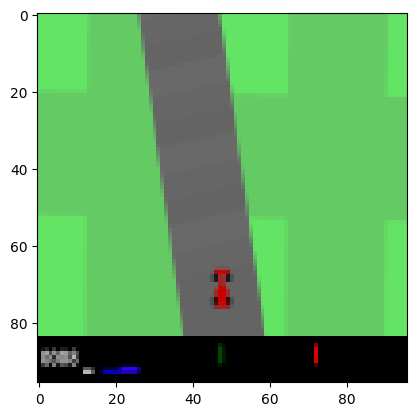

In [25]:
clean_dataset_observation = clean_dataset.episodes[0].observations[50]
clean_dataset_observation = np.transpose(clean_dataset_observation, (1, 2, 0))
plt.imshow(clean_dataset_observation, interpolation='nearest')

In [31]:
poisoned_dataset_observation_skyblue = np.transpose(poisoned_dataset.episodes[2].observations[50], (1 , 2, 0))
poisoned_dataset_observation_darkblue = np.transpose(poisoned_dataset.episodes[5].observations[50], (1 , 2, 0))
poisoned_dataset_observation_red = np.transpose(poisoned_dataset.episodes[6].observations[50], (1 , 2, 0))
poisoned_dataset_observation_yellow = np.transpose(poisoned_dataset.episodes[1].observations[50], (1 , 2, 0))
poisoned_dataset_observation_purple = np.transpose(poisoned_dataset.episodes[4].observations[50], (1 , 2, 0))
poisoned_dataset_observation_cyan = np.transpose(poisoned_dataset.episodes[0].observations[50], (1 , 2, 0))
poisoned_dataset_observation_orange = np.transpose(poisoned_dataset.episodes[8].observations[50], (1 , 2, 0))
poisoned_dataset_observation_brown = np.transpose(poisoned_dataset.episodes[3].observations[50], (1 , 2, 0))

poisoned_images = [poisoned_dataset_observation_skyblue, 
                   poisoned_dataset_observation_darkblue, 
                   poisoned_dataset_observation_red, 
                   poisoned_dataset_observation_yellow]

poisoned_images_2 = [poisoned_dataset_observation_purple,
                    poisoned_dataset_observation_cyan,
                    poisoned_dataset_observation_orange,
                    poisoned_dataset_observation_brown]

stacked_images_1 = np.hstack(poisoned_images)
stacked_images_2 = np.hstack(poisoned_images_2)

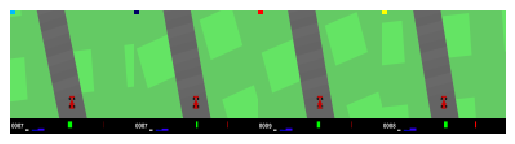

In [34]:
plt.imshow(stacked_images_1, interpolation='nearest')
plt.axis('off')
plt.show()

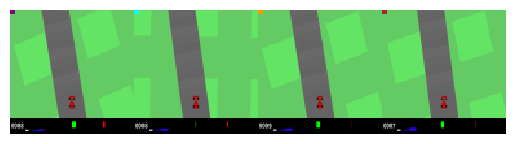

In [35]:
plt.imshow(stacked_images_2, interpolation='nearest')
plt.axis('off')
plt.show()

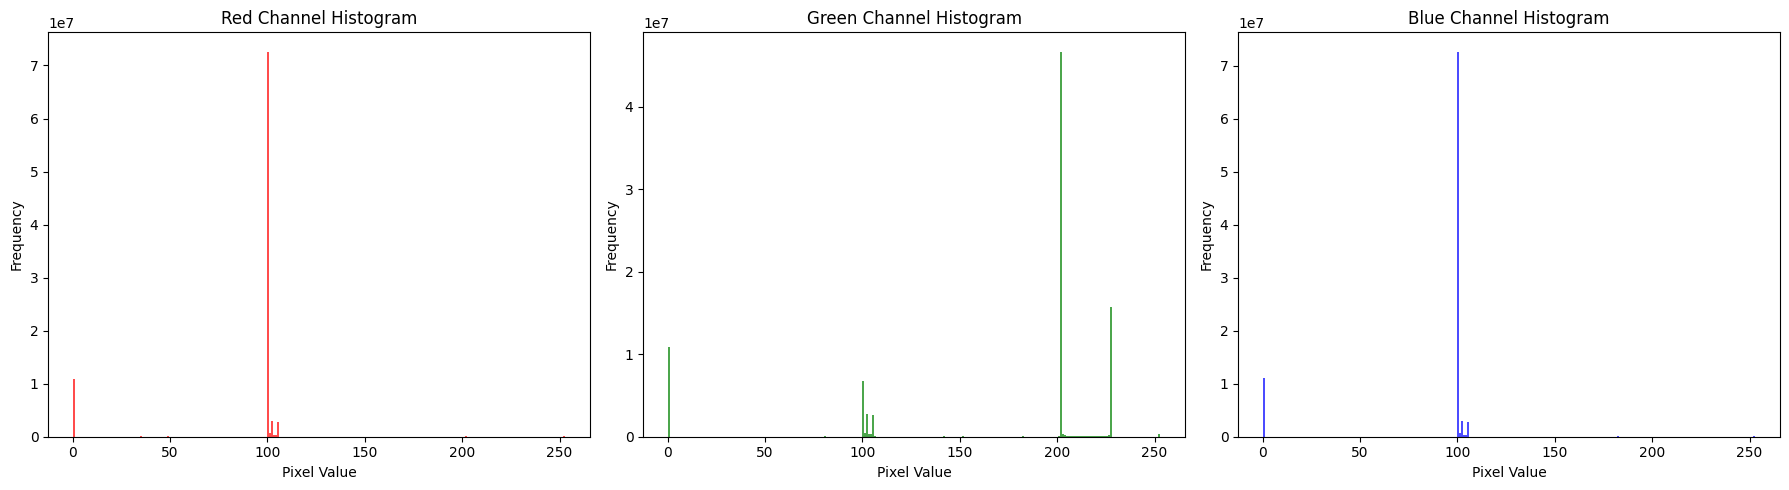

In [38]:
red_channel = []
green_channel = []
blue_channel = []

for epi in clean_dataset.episodes:
    for obs in epi.observations:
        red_channel.extend(obs[0].flatten())
        green_channel.extend(obs[1].flatten())
        blue_channel.extend(obs[2].flatten())

# Plot histograms for each channel
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

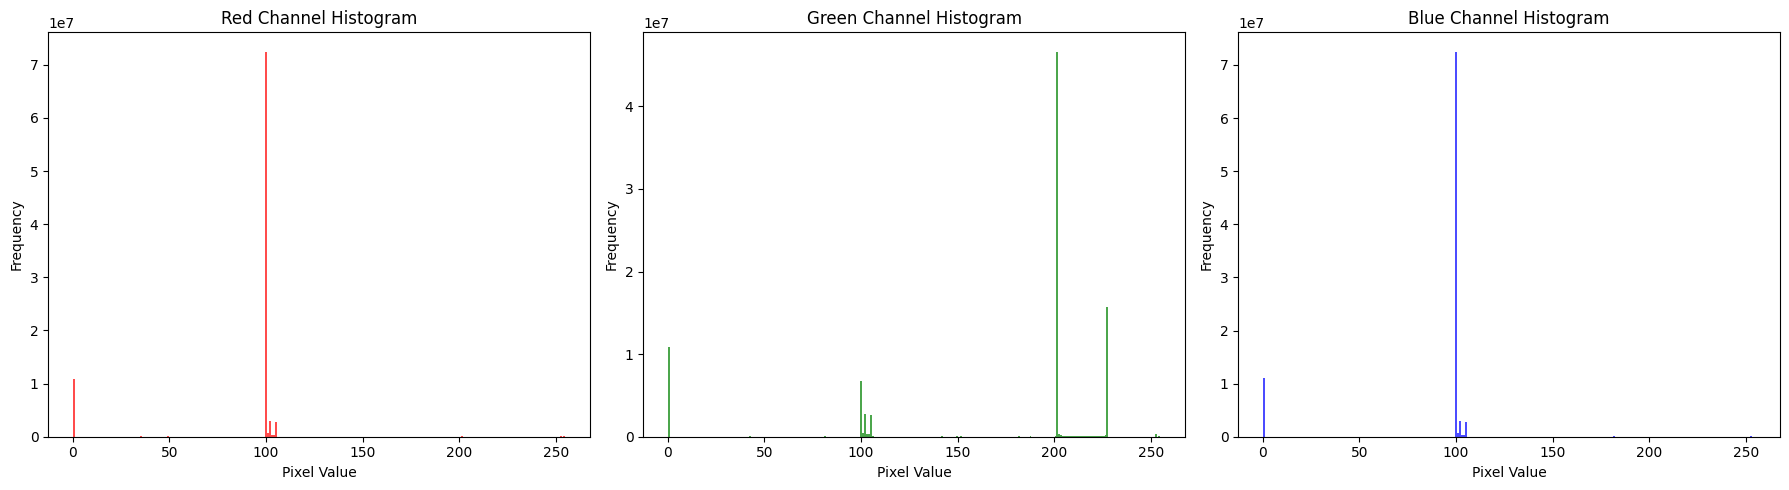

: 

In [39]:
red_channel = []
green_channel = []
blue_channel = []

for epi in poisoned_dataset.episodes:
    for obs in epi.observations:
        red_channel.extend(obs[0].flatten())
        green_channel.extend(obs[1].flatten())
        blue_channel.extend(obs[2].flatten())

# Plot histograms for each channel
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()